### P.S: To predict wheather the passenger survived or not based upon different independent attributes

### Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
df=pd.read_csv("titanic.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### EDA and visualization

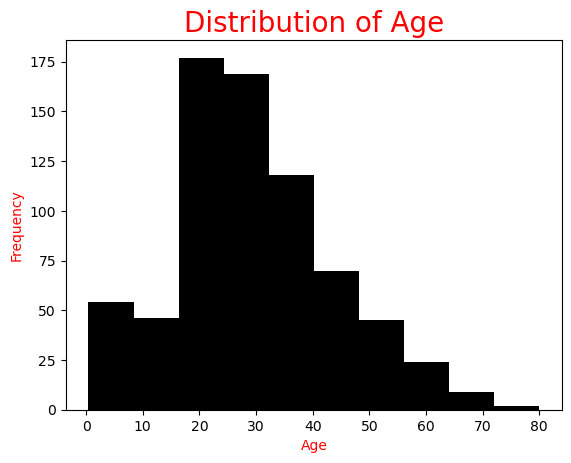

In [12]:
plt.hist(x=df['Age'],color='black')
plt.title("Distribution of Age", fontsize=20, color='red')
plt.xlabel('Age', fontsize=10,color='red')
plt.ylabel('Frequency', fontsize=10,color='red')
plt.show()

male      577
female    314
Name: Sex, dtype: int64

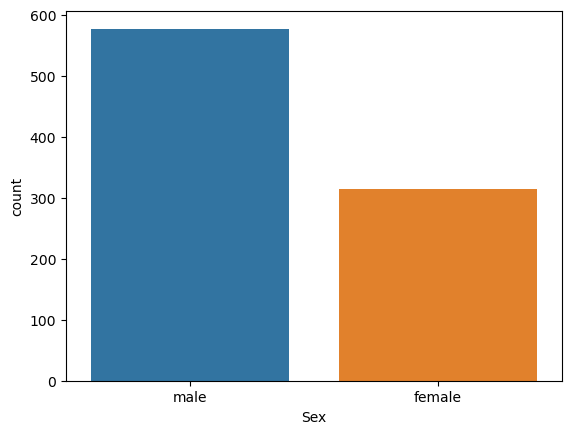

In [13]:
sns.countplot(x='Sex', data=df)
df['Sex'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

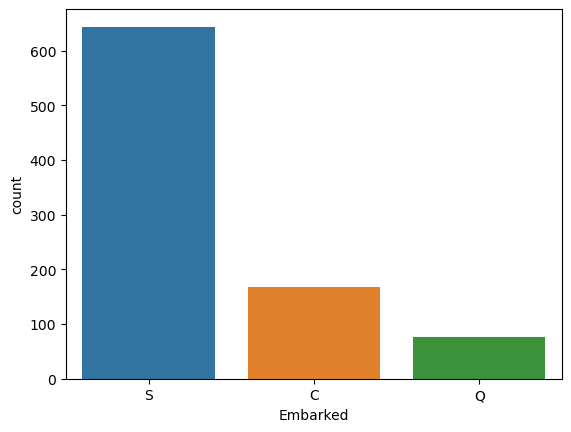

In [14]:
sns.countplot(x='Embarked', data=df)
df['Embarked'].value_counts()

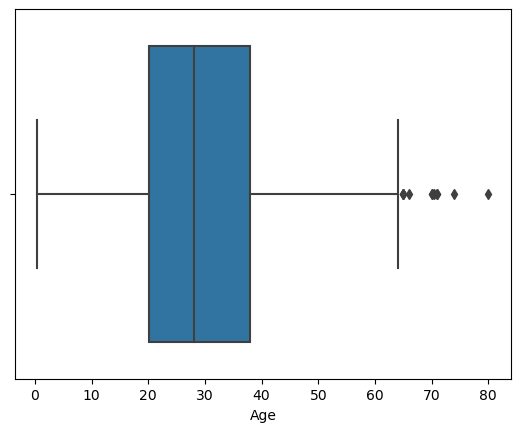

In [15]:
sns.boxplot(x='Age',data=df)
plt.show()

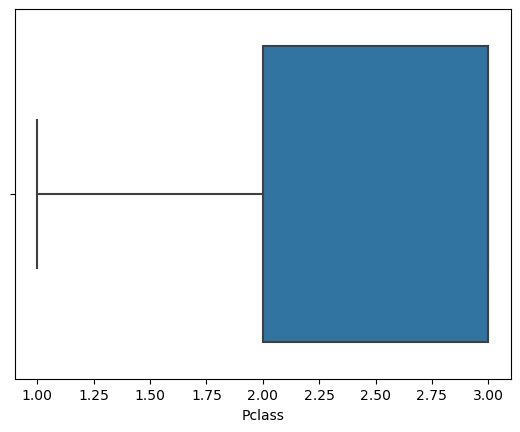

In [16]:
sns.boxplot(x='Pclass',data=df)
plt.show()

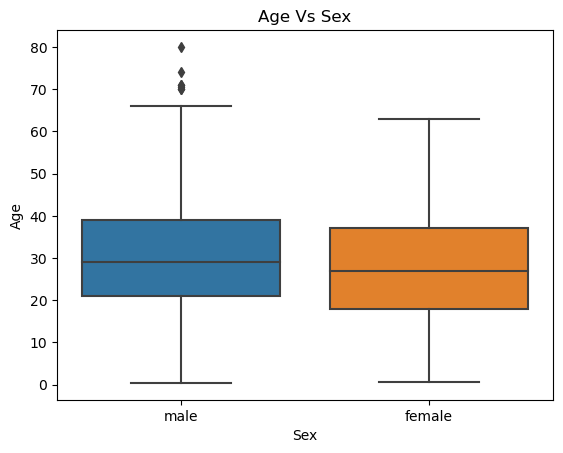

In [17]:
sns.boxplot(x='Sex',y='Age',data=df)
plt.title('Age Vs Sex')
plt.show()

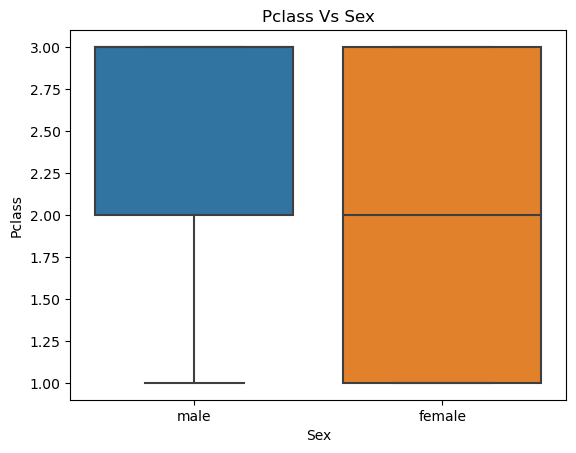

In [18]:
sns.boxplot(x='Sex',y='Pclass',data=df)
plt.title('Pclass Vs Sex')
plt.show()

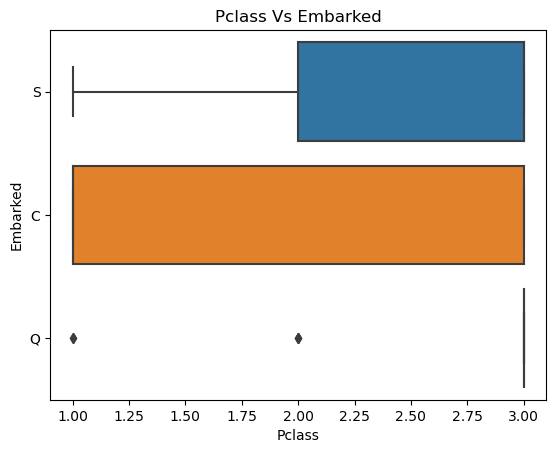

In [19]:
sns.boxplot(x='Pclass',y='Embarked',data=df)
plt.title('Pclass Vs Embarked')
plt.show()

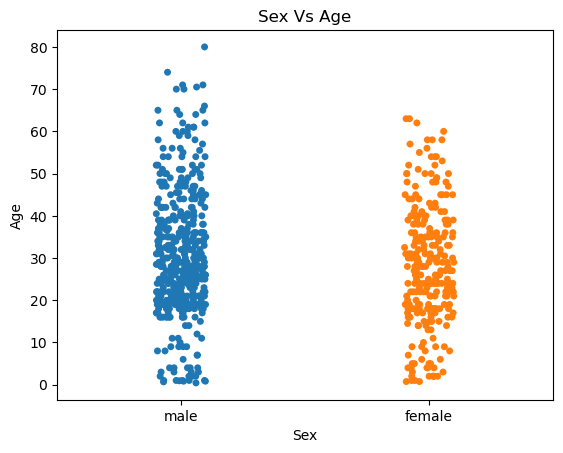

In [20]:
sns.stripplot(x='Sex',y='Age',data=df)
plt.title('Sex Vs Age')
plt.show()

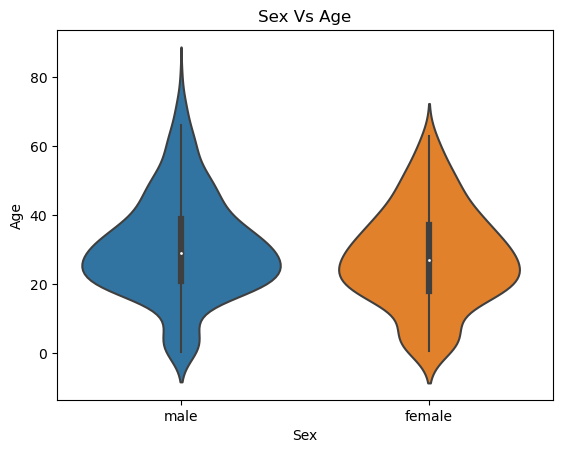

In [21]:
sns.violinplot(x='Sex',y='Age',data=df)
plt.title('Sex Vs Age')
plt.show()

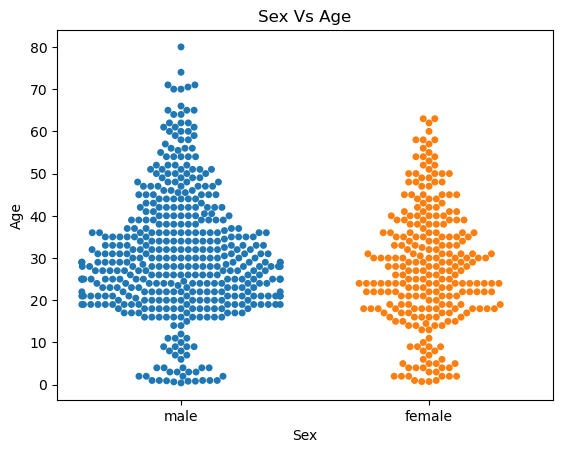

In [22]:
sns.swarmplot(x='Sex',y='Age',data=df)
plt.title('Sex Vs Age')
plt.show()

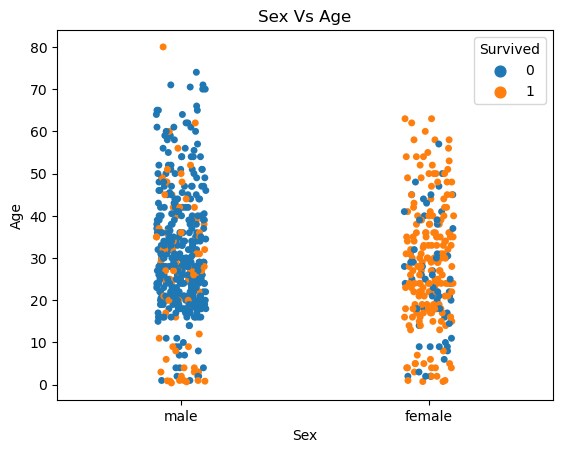

In [23]:
sns.stripplot(x='Sex',y='Age',data=df, hue='Survived')
plt.title('Sex Vs Age')
plt.show()

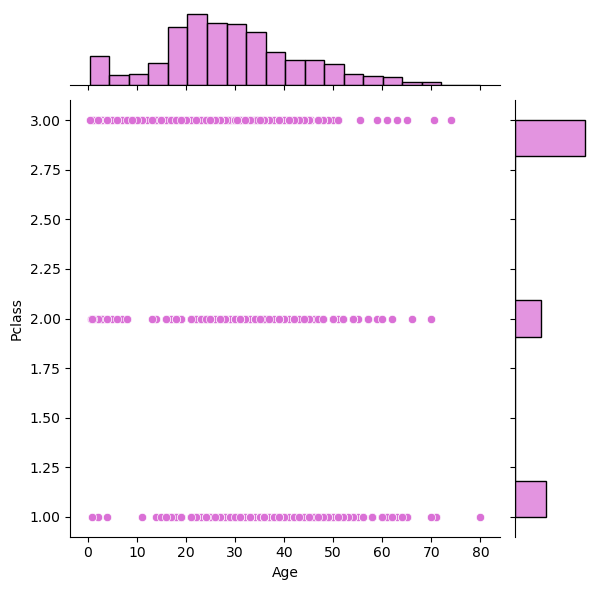

In [24]:
sns.jointplot(x='Age', y= 'Pclass', color='orchid', data=df)
plt.show()              

<AxesSubplot:xlabel='Sex', ylabel='count'>

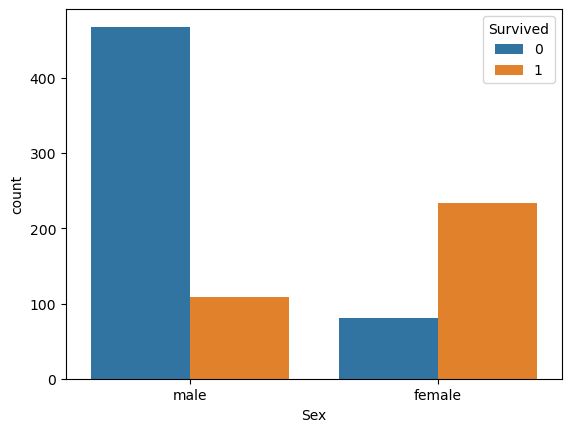

In [25]:
sns.countplot(x="Sex",hue="Survived",data=df)

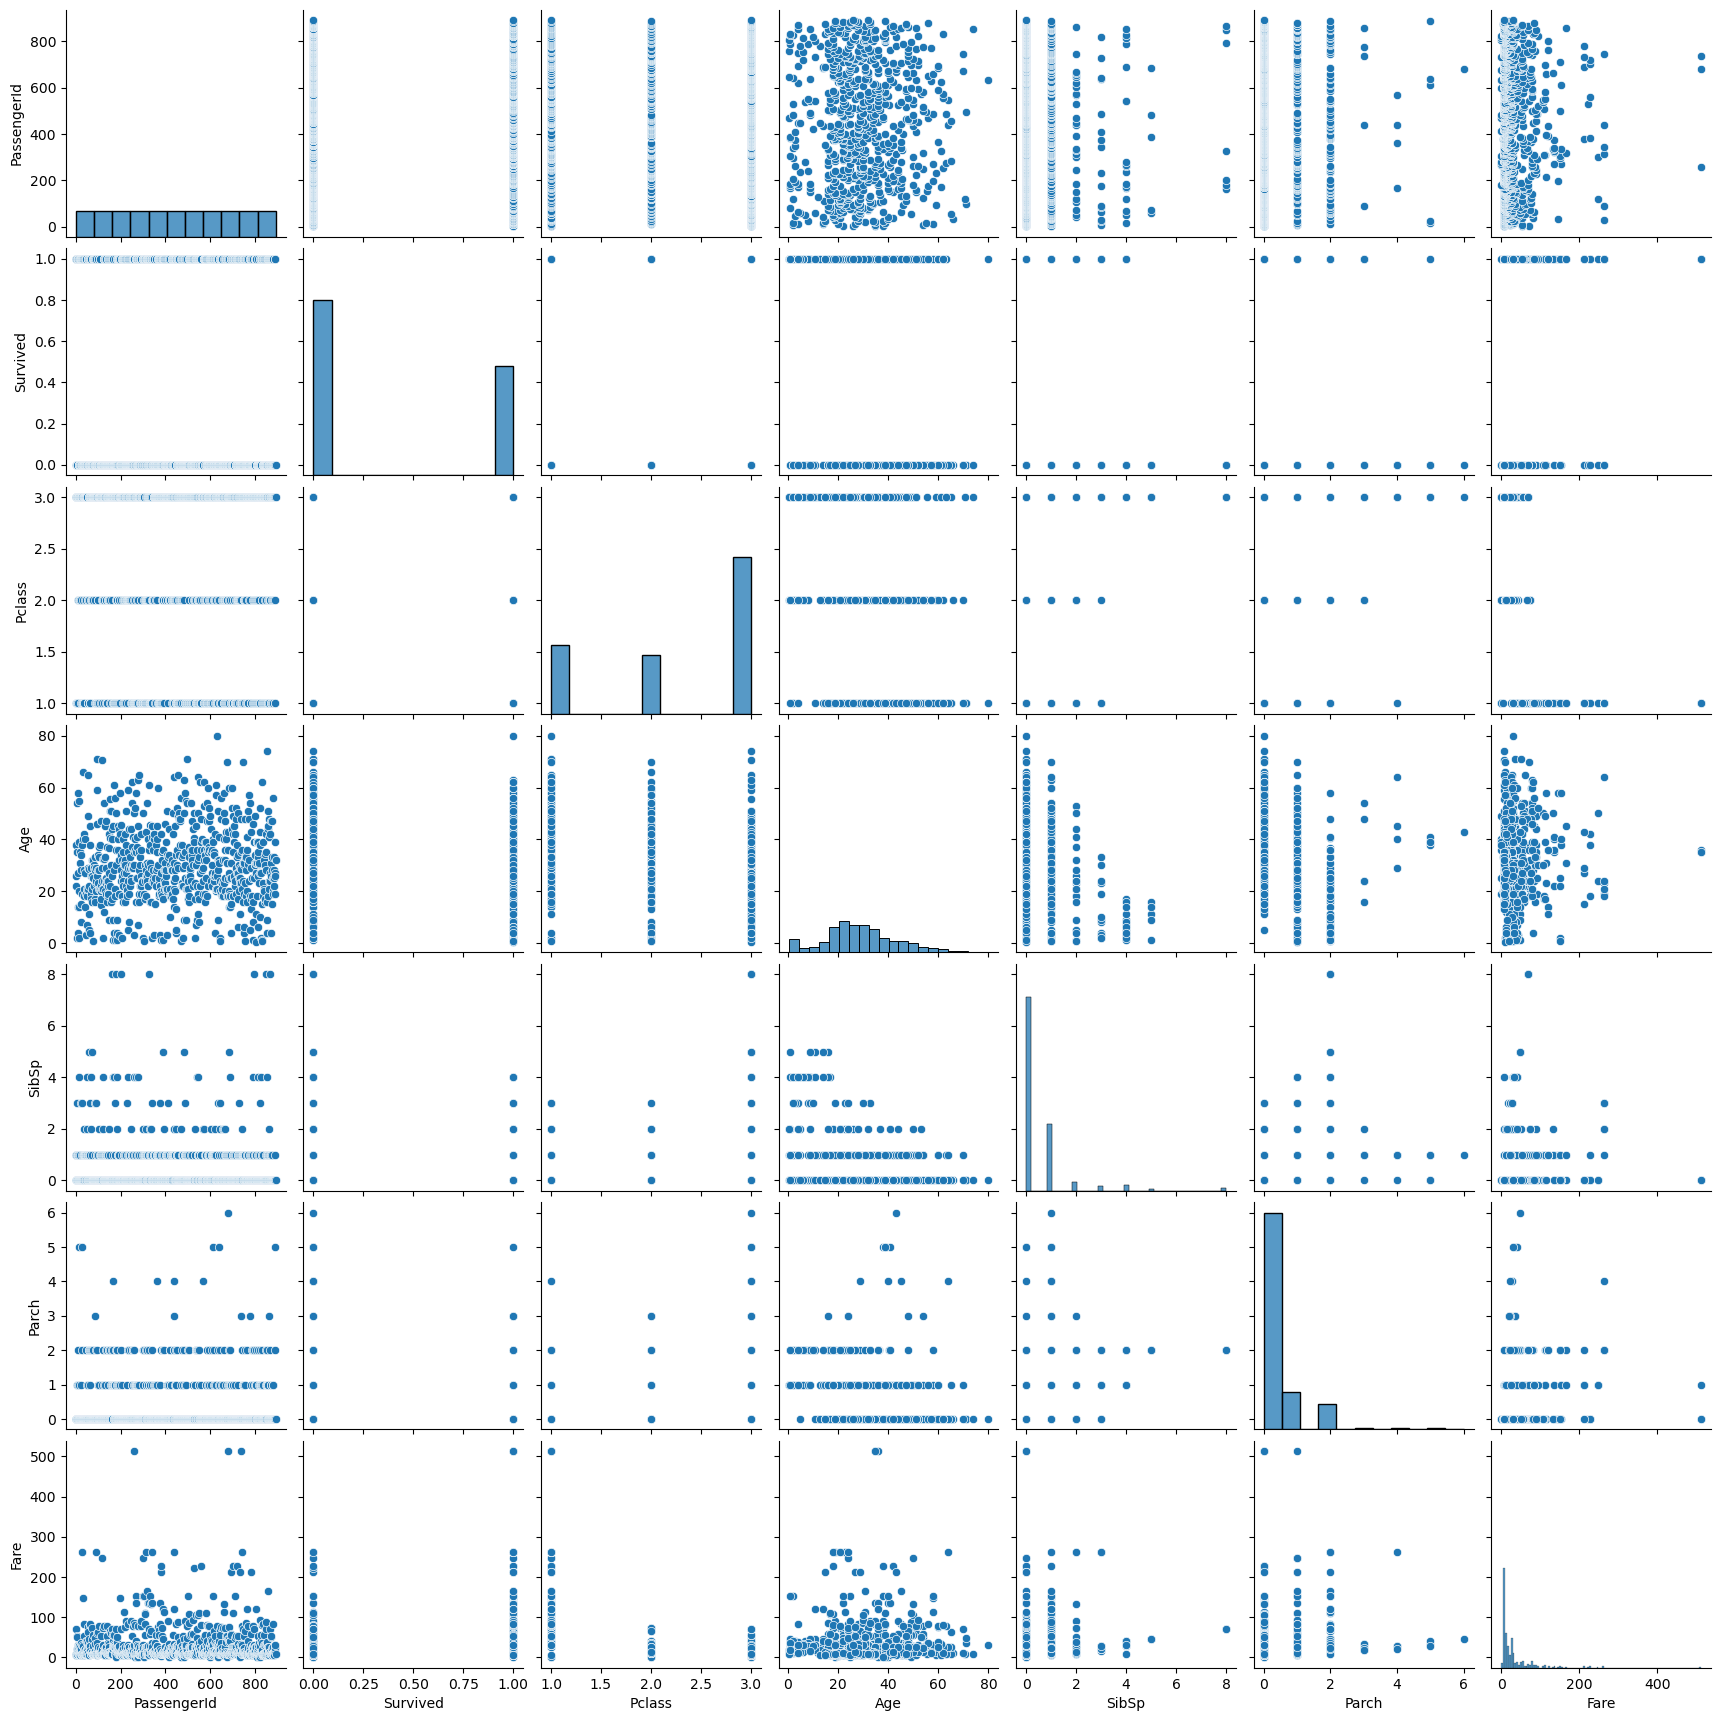

In [26]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

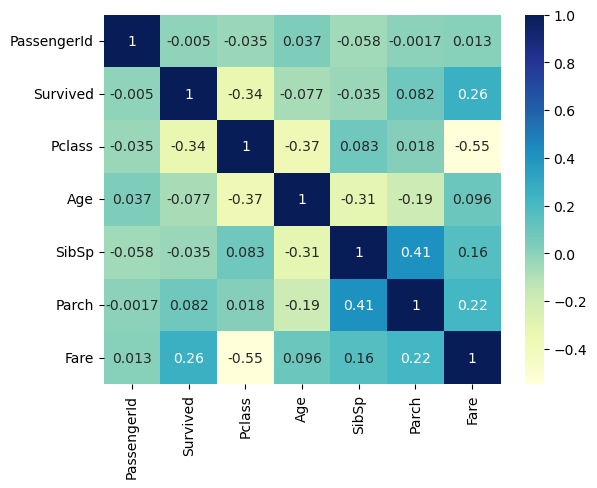

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

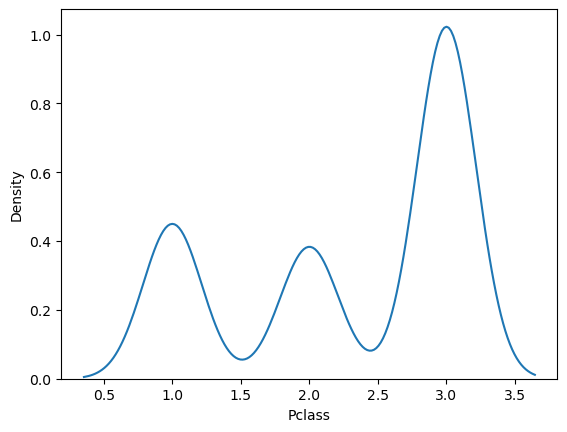

In [28]:
sns.distplot(df['Pclass'],hist=False)

In [29]:
median1=df['Age'].median()
median1


28.0

In [30]:
df['Age']=df['Age'].replace(np.nan,median1)

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [33]:
df=df.drop(['Cabin'], axis=1)

In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

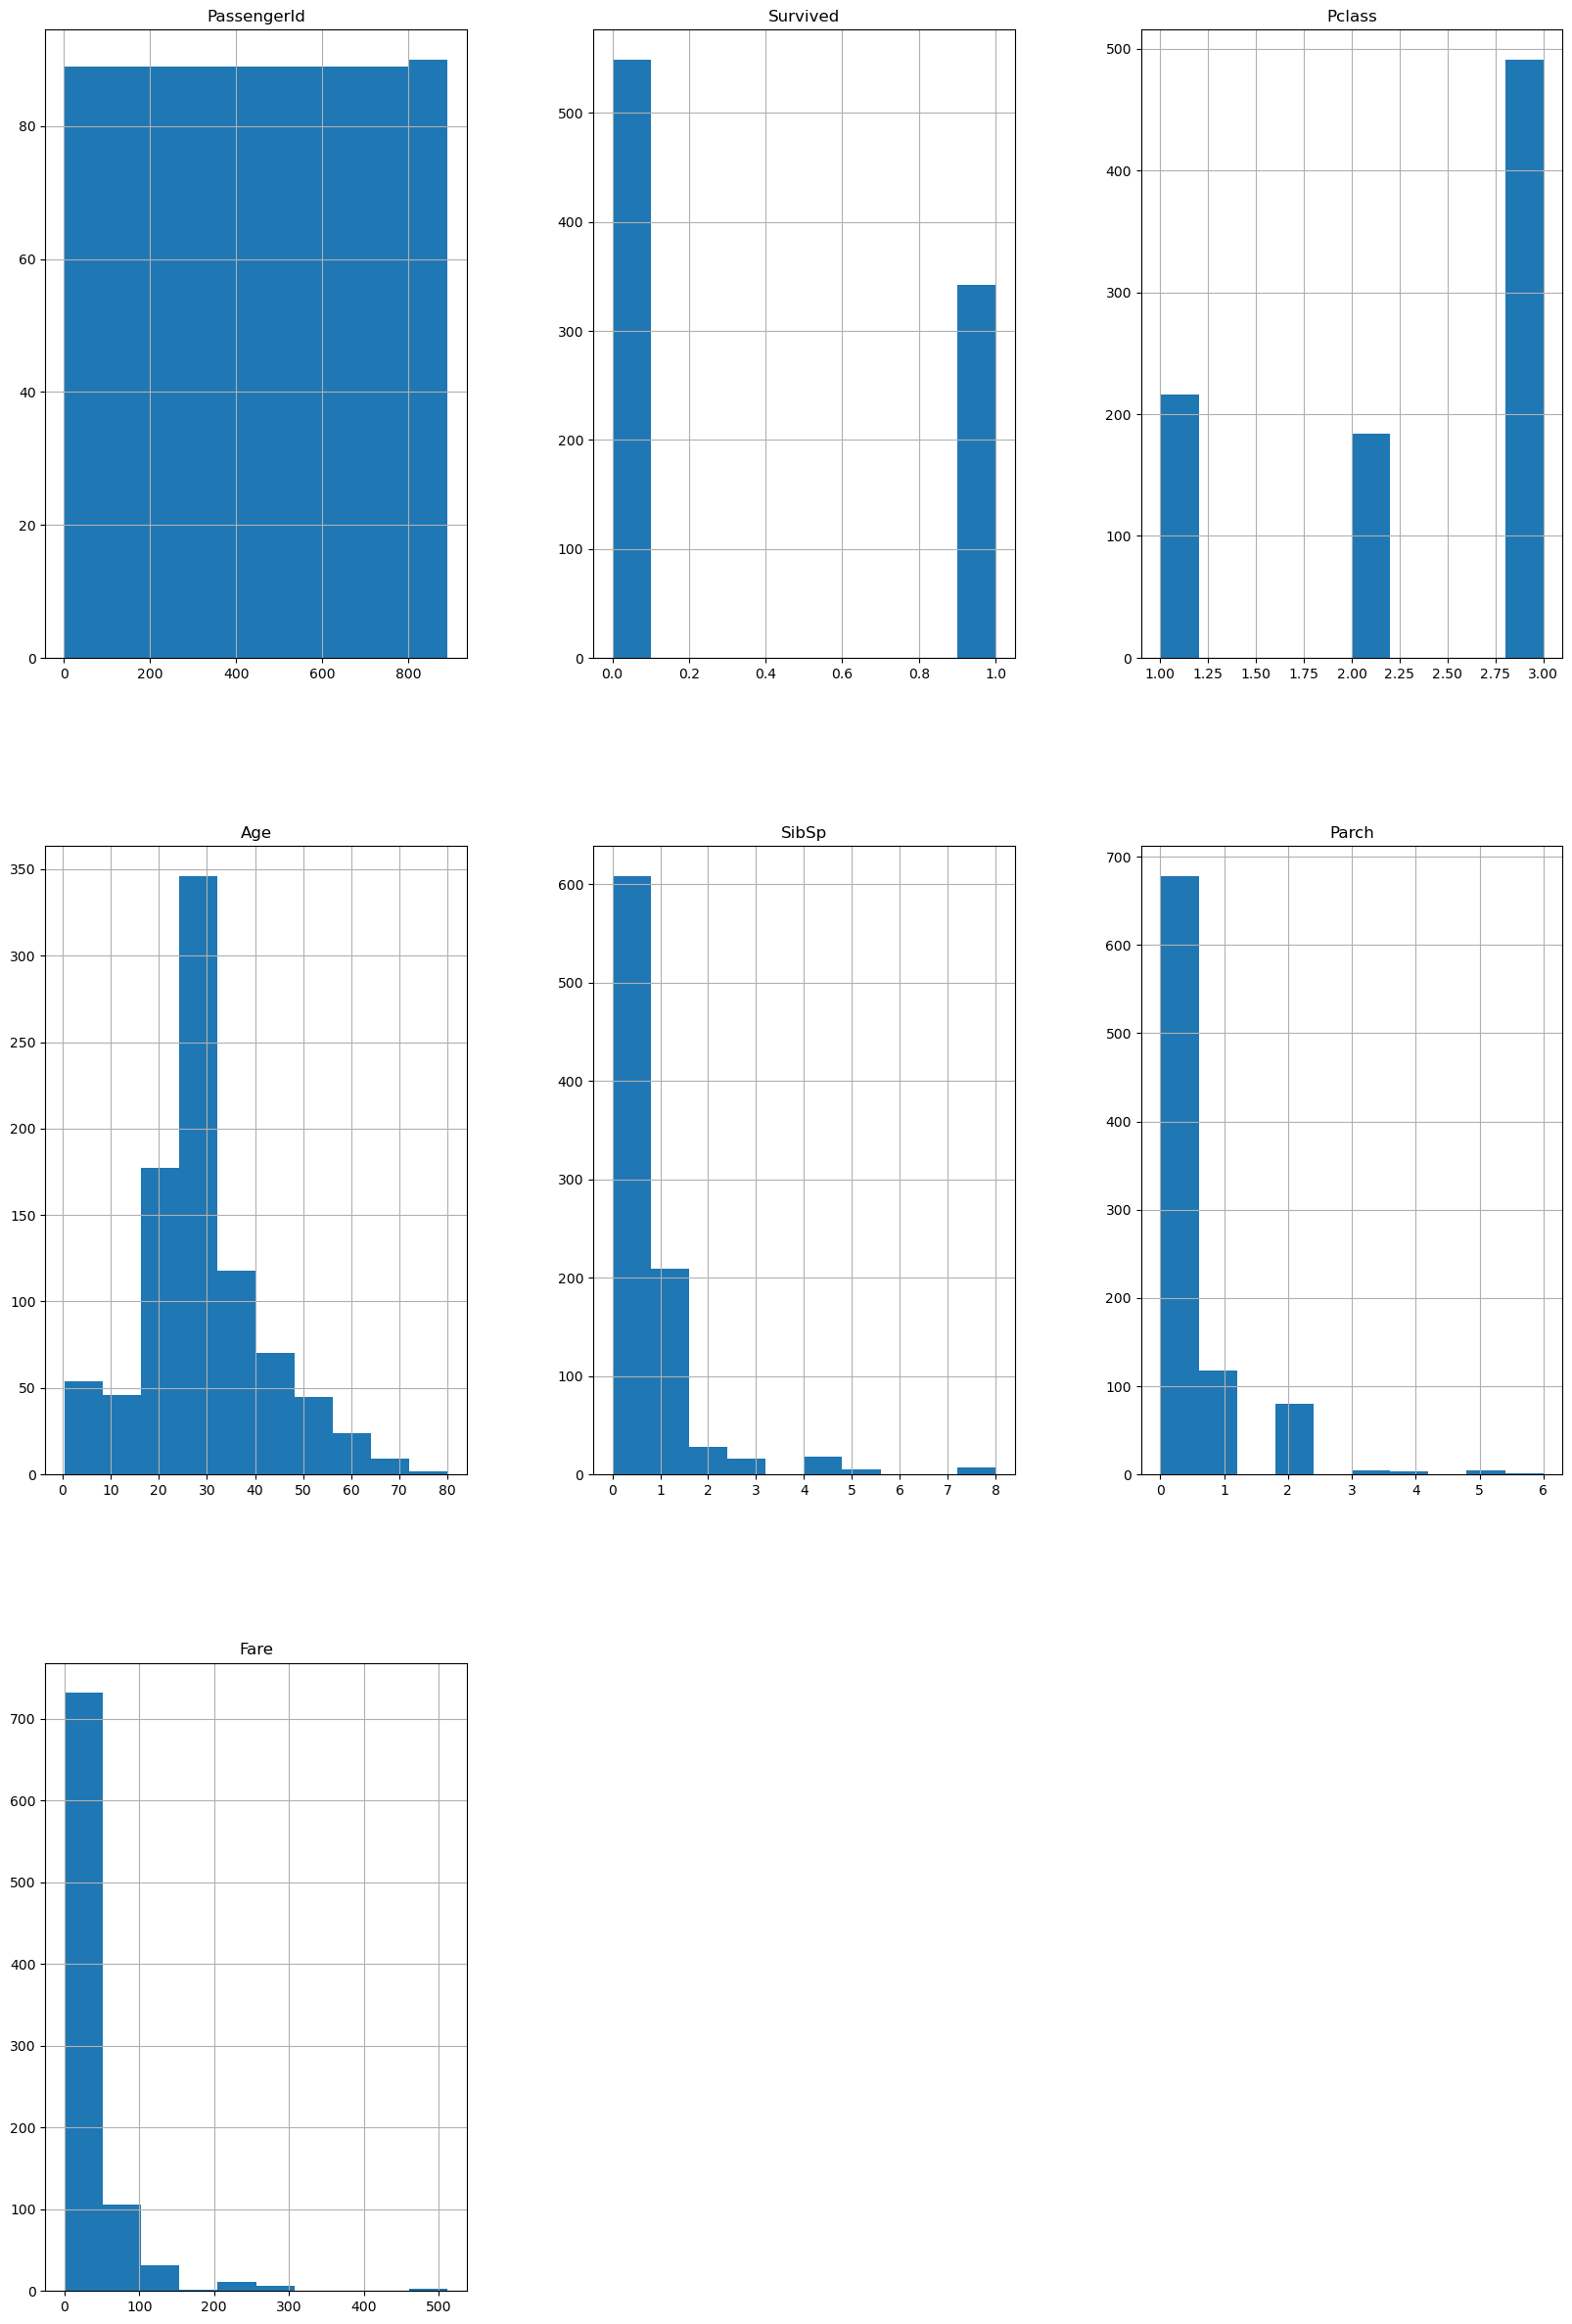

In [35]:
df.hist(figsize=(20,30))
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [46]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest classifier 

In [49]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions
y_pred = clf.predict(X_test)

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [52]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.8044692737430168


In [54]:
print(f"Confusion Matrix:\n{confusion}")

Confusion Matrix:
[[90 15]
 [20 54]]


In [55]:
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression

In [63]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred_lr = logistic_regression.predict(X_test)

In [65]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.7988826815642458


### SVM

In [66]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [67]:
y_pred_svm = svm_classifier.predict(X_test)

In [68]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.8100558659217877


### KNN

In [69]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred_knn = knn_classifier.predict(X_test)

In [71]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-NN Accuracy: {accuracy_knn}")

K-NN Accuracy: 0.7877094972067039


### Decision Tree Classifier

In [72]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
y_pred_dt = decision_tree.predict(X_test)

In [74]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.7430167597765364
